In [41]:
import matplotlib.pyplot as plt

In [42]:
episode_length_list = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000]

lstm_total = {128:[], 256:[], 512:[]}
mate_total = {128:[], 256:[], 512:[]}

with open("./backprop_time.txt", "r") as f:
    for line in f:
        if "Model:" in line and "Backprop time:" in line:
            parts = line.split()
            

            try:
                model_name = parts[1]
                hidden_dim = int(parts[2])
                time_seconds = float(parts[-1])

                if model_name == "lstm":
                    if hidden_dim in lstm_total:
                        lstm_total[hidden_dim].append(time_seconds)
                elif model_name == "mate":
                    if hidden_dim in mate_total:
                        mate_total[hidden_dim].append(time_seconds)


                else:
                    raise ValueError
            except (ValueError, IndexError):
                continue



In [43]:
print(lstm_total)

{128: [0.10012507904320955, 0.10094489995390177, 0.10991691891103983, 0.12207550927996635, 0.13191950973123312, 0.13171557895839214, 0.1443717936053872, 0.13465984910726547, 0.16514166351407766, 0.15858555026352406, 0.14736389368772507, 0.18276708479970694, 0.1649373983964324, 0.1869387160986662, 0.21179463248699903, 0.231849892064929], 256: [0.13384190667420626, 0.19488418754190207, 0.31982378009706736, 0.4286983497440815, 0.531635164283216, 0.6307711321860552, 0.7830230658873916, 0.8389067370444536, 0.9452889133244753, 1.1061504036188126, 1.163886017166078, 1.7627355670556426, 2.391465289518237, 3.062959327362478, 3.6809990080073476, 4.362526265904307, 5.007808912545443, 5.664123797789216], 512: [0.14533137902617455, 0.2017202414572239, 0.3160012746229768, 0.4336256552487612, 0.5485241701826453, 0.8056082678958774, 0.9088873378932476, 1.152292505837977, 1.385057969018817, 1.6039975136518478, 1.8484594030305743, 3.0168322548270226, 4.214534739032388]}


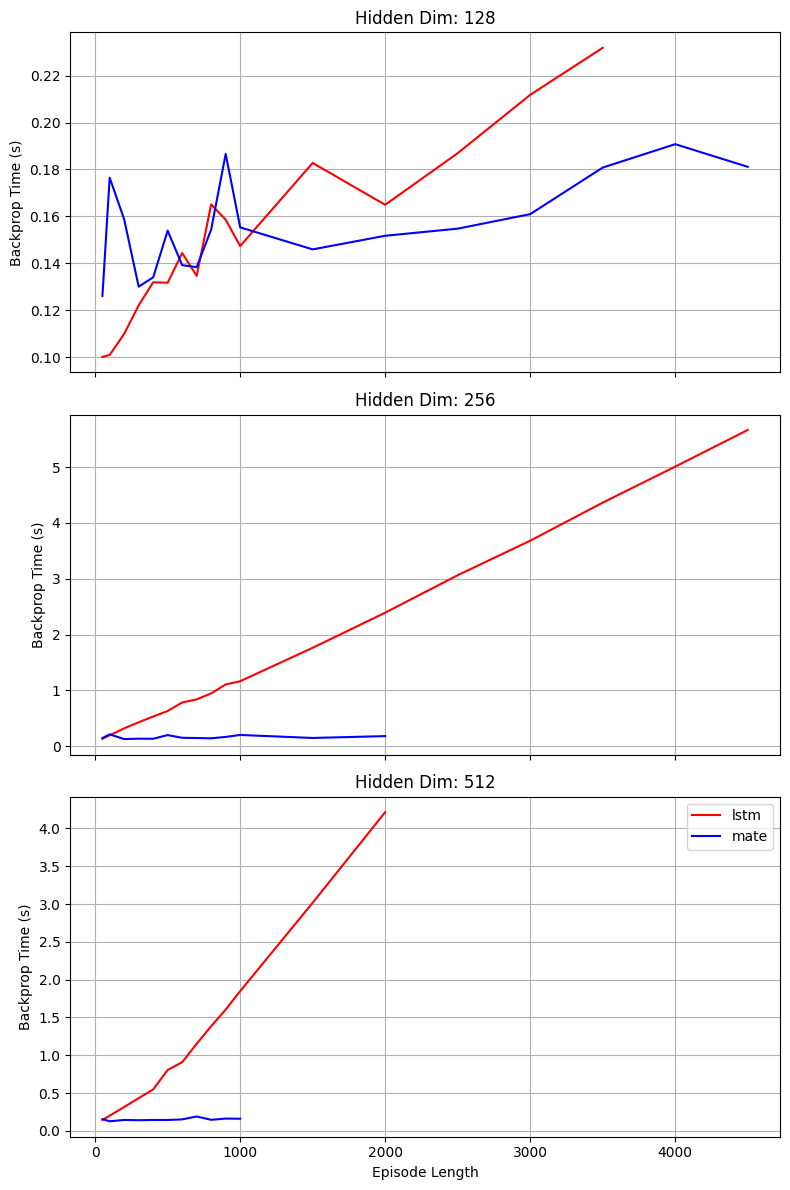

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
hidden_dims = [128, 256, 512]

for i, dim in enumerate(hidden_dims):
    if dim in lstm_total:
        y_values = lstm_total[dim]
        x_values = episode_length_list[:len(y_values)]

        axes[i].plot(x_values, y_values, 'r', label="lstm")
    if dim in mate_total:
        y_values = mate_total[dim]
        x_values = episode_length_list[:len(y_values)]
        axes[i].plot(x_values, y_values, 'b', label="mate")
    axes[i].set_title(f'Hidden Dim: {dim}')
    axes[i].set_ylabel('Backprop Time (s)')
    axes[i].grid(True)

plt.xlabel('Episode Length')
#plt.title('BackProp Time')
plt.tight_layout()
plt.legend()
plt.show()